In [1]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statistics import mean
import scipy
from pathlib import Path
import math
from scipy.optimize import curve_fit,least_squares,leastsq
from scipy.interpolate import interp1d
from scipy.optimize import Bounds
from scipy.fft import fft, fftfreq
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal 
from scipy.signal import lombscargle
import operator
import riip
import matplotlib.colors as colors
import matplotlib.patches as patches

In [ ]:
path = 'C:\\Users\\khart\\Documents\\Summer2022Campaign\\IRCSP1\\Acktar\\Capture'
captures = np.arange(0,1916,1)
num = len(captures)
img1 = np.zeros([num,10,256,320])
img2 = np.zeros([num,10,256,320])
t1 = np.zeros(num)
t2 = np.zeros(num)
for i in range(num):
    with h5py.File(path + str(captures[i]) + str('.h5'), "r") as f:
        #print(f.keys())
        img1[i] = np.array(f[list(f.keys())[0]]) #cam 1 is reflection camera
        t1[i] = np.array(f[list(f.keys())[4]])
        img2[i] = np.array(f[list(f.keys())[1]]) #cam 2 is transmission camera
        t2[i] = np.array(f[list(f.keys())[5]])



In [ ]:
im1 = np.mean(img1,axis = 1)
im2 = np.mean(img2,axis = 1)

In [ ]:
xmin1 = 105; xmax1 = 170; #active region
ymin1 = 100; ymax1 = 140;
xmin2 = 105; xmax2 = 170;
ymin2 = 110; ymax2 = 150;

In [ ]:
plt.imshow(im1[0])

In [122]:
active1 = []
active2 = []
acktar1_region1 = []
acktar2_region1 = []
acktar1_region2 = []
acktar2_region2 = []
acktar1_region3 = []
acktar2_region3 = []


for t in range(len(im1)):
    a1 = np.mean(im1[t][ymin1:ymax1,xmin1:xmax1])
    a2 = np.mean(im2[t][ymin2:ymax2,xmin2:xmax2])
    b1 = np.mean(im1[t][110:130,25:75])
    b2 = np.mean(im2[t][110:140,25:75])
    c1 = np.mean(im1[t][160:170,145:155])
    c2 = np.mean(im2[t][200:256,130:150])    
    d1 = np.mean(im1[t][160:170,0:25])
    d2 = np.mean(im2[t][200:256,0:50]) 
    d1 = np.mean(im1[t][170:200,0:50])
    d2 = np.mean(im2[t][190:225,0:50])
    

    active1.append(a1)
    active2.append(a2)
    acktar1_region1.append(b1)
    acktar2_region1.append(b2)
    acktar1_region2.append(c1)
    acktar2_region2.append(c2)
    acktar1_region3.append(d1)
    acktar2_region3.append(d2)

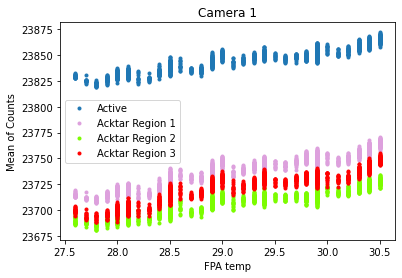

In [123]:
plt.plot(t1,active1,'.',label= 'Active')
plt.plot(t1, acktar1_region1,'.',label = 'Acktar Region 1',color = 'plum')
plt.plot(t1,acktar1_region2,'.',label = 'Acktar Region 2', color = 'lawngreen')
plt.plot(t1,acktar1_region3,'.',label = 'Acktar Region 3',color = 'red')
plt.title("Camera 1")
plt.ylabel("Mean of Counts")
plt.xlabel('FPA temp')
plt.legend()


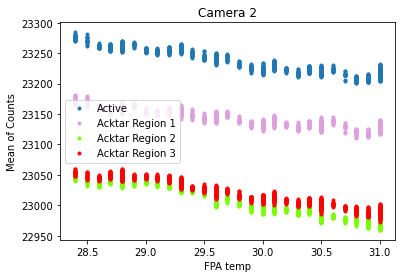

In [124]:
plt.plot(t2,active2,'.',label= 'Active')
plt.plot(t2, acktar2_region1,'.',label = 'Acktar Region 1',color = 'plum')
plt.plot(t2,acktar2_region2,'.',label = 'Acktar Region 2', color = 'lawngreen')
plt.plot(t2,acktar2_region3,'.',label = 'Acktar Region 3',color = 'red')
plt.title("Camera 2")
plt.ylabel("Mean of Counts")
plt.xlabel('FPA temp')
plt.legend()


In [125]:
diff1_region1 = []
diff2_region1 = []
diff1_region2 = []
diff2_region2 = []
diff1_region3 = []
diff2_region3 = []
for i in range(len(active1)):
    a1 = active1[i] - acktar1_region1[i]
    a2 = active2[i] - acktar2_region1[i]
    b1 = active1[i] - acktar1_region2[i]
    b2 = active2[i] - acktar2_region2[i]
    c1 = active1[i] - acktar1_region3[i]
    c2 = active2[i] - acktar2_region3[i]
    
    diff1_region1.append(a1)
    diff2_region1.append(a2)
    diff1_region2.append(b1)
    diff2_region2.append(b2)
    diff1_region3.append(c1)
    diff2_region3.append(c2)

Text(0.5, 0, 'FPA temp')

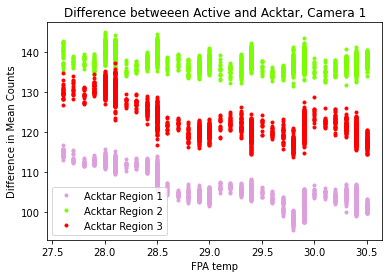

In [126]:
plt.plot(t1,diff1_region1,'.',color='plum',label='Acktar Region 1')
plt.plot(t1,diff1_region2,'.',color= 'lawngreen',label='Acktar Region 2')
plt.plot(t1,diff1_region3,'.',color = 'red',label = 'Acktar Region 3')
plt.legend()
plt.title("Difference betweeen Active and Acktar, Camera 1")
plt.ylabel("Difference in Mean Counts")
plt.xlabel("FPA temp")

Text(0.5, 0, 'FPA temp')

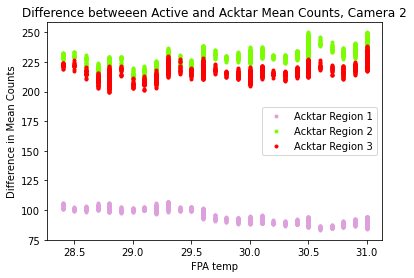

In [130]:
plt.plot(t2,diff2_region1,'.',color='plum',label='Acktar Region 1')
plt.plot(t2,diff2_region2,'.',color= 'lawngreen',label='Acktar Region 2')
plt.plot(t2,diff2_region3,'.',color = 'red',label = 'Acktar Region 3')
plt.legend()
plt.title("Difference betweeen Active and Acktar Mean Counts, Camera 2")
plt.ylabel("Difference in Mean Counts")
plt.xlabel("FPA temp")